In [ ]:
pip install openml

In [1]:
 from sklearn.datasets import fetch_openml

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import os
from skimage import io, color, feature, exposure
import pandas as pd

In [3]:
fashion_mnist = fetch_openml(data_id=40996, cache=True, parser='auto')

In [4]:
X, y = fashion_mnist.data, fashion_mnist.target

In [5]:
def extract_hog_features(image):
    # Reshape the image to (28, 28)
    image_reshaped = image.values.reshape((28, 28))

    # Calculate HOG features
    hog_features, hog_image = hog(image_reshaped, visualize=True)

    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled


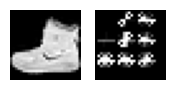

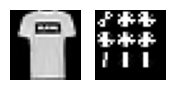

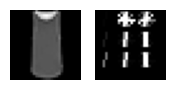

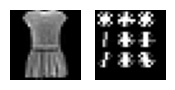

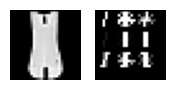

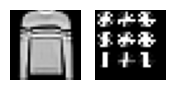

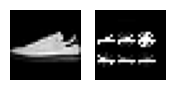

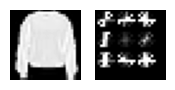

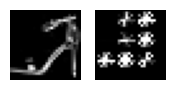

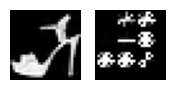

In [6]:
# Initialize an empty list to store HOG features
features_list = []

# Loop through each sample in the dataset
num_samples_to_display = 10

for i in range(len(X)):
    # Extract HOG features
    hog_features, hog_image = extract_hog_features(X.iloc[i])

    # Append HOG features to the features list
    features_list.append(hog_features)

    # Display the original image and the HOG features for the first 10 samples
    if i < num_samples_to_display:
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2, 2), sharex=True, sharey=True)

        ax1.axis('off')
        ax1.imshow(X.iloc[i].values.reshape(28, 28), cmap=plt.cm.gray)
        
        ax2.axis('off')
        ax2.imshow(hog_image, cmap=plt.cm.gray)
        
        plt.show()

# Convert the features list to a NumPy array
features_array = np.array(features_list)


In [7]:
# Print the HOG features for all samples
print(features_array)

[[0.         0.         0.         ... 0.03366572 0.03303958 0.0462374 ]
 [0.2303257  0.1379896  0.20126778 ... 0.00455071 0.0083015  0.237459  ]
 [0.00487256 0.         0.         ... 0.00172271 0.0505074  0.28417499]
 ...
 [0.00233757 0.00116155 0.         ... 0.0020304  0.07239346 0.24108798]
 [0.         0.         0.         ... 0.         0.0145459  0.13388452]
 [0.00065133 0.         0.         ... 0.02140746 0.11879873 0.02346832]]


In [8]:
#apply k means algorithm
from sklearn.cluster import KMeans

In [9]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) 
kmeans.fit(features_array)

KMeans(n_clusters=5, n_init=10, random_state=42)

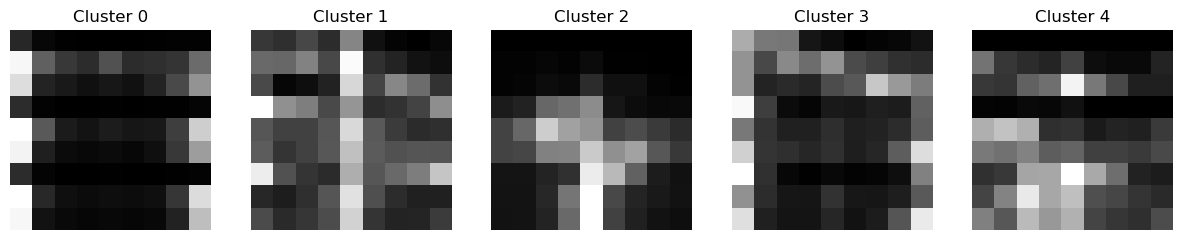

In [10]:
import matplotlib.pyplot as plt

# Visualize the cluster centers (representative images)
fig, ax = plt.subplots(1, n_clusters, figsize=(15, 3))

for i in range(n_clusters):
    center_image = kmeans.cluster_centers_[i].reshape((9, 9))
    ax[i].imshow(center_image, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'Cluster {i}')

plt.show()
